# 1.손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!



### (1)데이터 가져오기
* sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
* diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [89]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabets=load_diabetes()
print(dir(diabets))

['DESCR', 'data', 'data_filename', 'feature_names', 'frame', 'target', 'target_filename']


In [91]:
df_x=pd.DataFrame(diabets.data, columns=diabets.feature_names)
df_y=pd.DataFrame(diabets.target, columns=['target'])

### (2) 모델에 입력할 데이터 x 준비하기

* df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

### (3) 모델에 입력할 데이터 x 준비하기

* df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [92]:
X = df_x.values
y = df_y['target'].values


### (4) train 데이터와 test 데이터로 분리하기

* x와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### (5) 모델 준비하기

* 입력 데이터 개수에 맞는 가중치 w와 b를 준비해주세요.
* 모델 함수를 구현해주세요.

In [94]:
W = np.random.rand(10)
b = np.random.rand()

In [95]:
def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

### (6) 손실함수 loss 정의하기

* 손실함수를 MSE 함수로 정의해주세요

In [96]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

In [97]:
def loss(X,W,b,y):
    predictions = model(X,W,b)
    Loss = MSE(predictions,y)
    return Loss

### (7) 기울기를 구하는 gradient 함수 구현하기

* 기울기를 계산하는 gradient 함수를 구현해주세요.

In [98]:
def gradient(X,W,b,y):
    N = len(W)
    y_pred = model(X,W,b)
    
    dW = 1/N * 2 * (X.T).dot(y_pred-y)
    db = 2 * (y_pred-y).mean()
    return dW, db

### (8) 하이퍼 파라미터인  학습률 설정하기

* 학습률, learning rate를 설정해주세요
* 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [99]:
learning_rate = 0.001

In [100]:
losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate*dW
    b -= learning_rate*db
    L = loss(X, W, b, y)
    losses.append(L)
    
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 27861.6311
Iteration 20 : Loss 26961.4960
Iteration 30 : Loss 26096.1132
Iteration 40 : Loss 25264.1225
Iteration 50 : Loss 24464.2173
Iteration 60 : Loss 23695.1423
Iteration 70 : Loss 22955.6912
Iteration 80 : Loss 22244.7055
Iteration 90 : Loss 21561.0718
Iteration 100 : Loss 20903.7206
Iteration 110 : Loss 20271.6244
Iteration 120 : Loss 19663.7960
Iteration 130 : Loss 19079.2869
Iteration 140 : Loss 18517.1858
Iteration 150 : Loss 17976.6173
Iteration 160 : Loss 17456.7403
Iteration 170 : Loss 16956.7466
Iteration 180 : Loss 16475.8599
Iteration 190 : Loss 16013.3343
Iteration 200 : Loss 15568.4531
Iteration 210 : Loss 15140.5277
Iteration 220 : Loss 14728.8967
Iteration 230 : Loss 14332.9246
Iteration 240 : Loss 13952.0006
Iteration 250 : Loss 13585.5381
Iteration 260 : Loss 13232.9735
Iteration 270 : Loss 12893.7651
Iteration 280 : Loss 12567.3928
Iteration 290 : Loss 12253.3566
Iteration 300 : Loss 11951.1762
Iteration 310 : Loss 11660.3901
Iteration 320 : L

### (9) 모델 학습하기

* 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
* loss 값이 충분히 떨어질 때까지 학습을 진행해주세요.
* 입력하는 데이터인 x 에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [101]:
predictions = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3271.0572048435033

### (10) test 데이터에 대한 성능 확인하기

* test 데이터에 대한 성능을 확인해주세요.


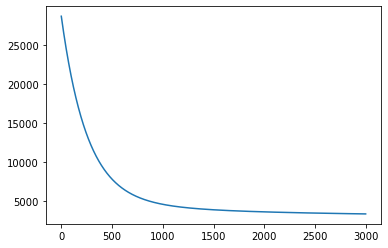

In [102]:
plt.plot(losses)
plt.show()

### (11) 정답 데이터와 예측한 데이터 시각화하기

* x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.


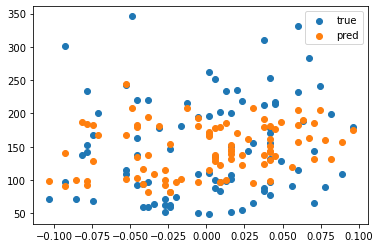

In [103]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

# 2. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명??

### (1) 데이터 가져오기 

* 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져옵니다.

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
train = pd.read_csv("/Users/user/aiffel/project/bike-sharing-demand/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연,월, 일, 시, 분, 초 까지 6가지 컬럼 생성하기

* to_datetime 활용
* pandas datetime extract year month day 키워드

In [108]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

### (3) year, month, day, hout, minute, second 데이터 개수 시각화하기

* sns.countplot 활용해서 시각화하기
* subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

In [109]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second

In [110]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


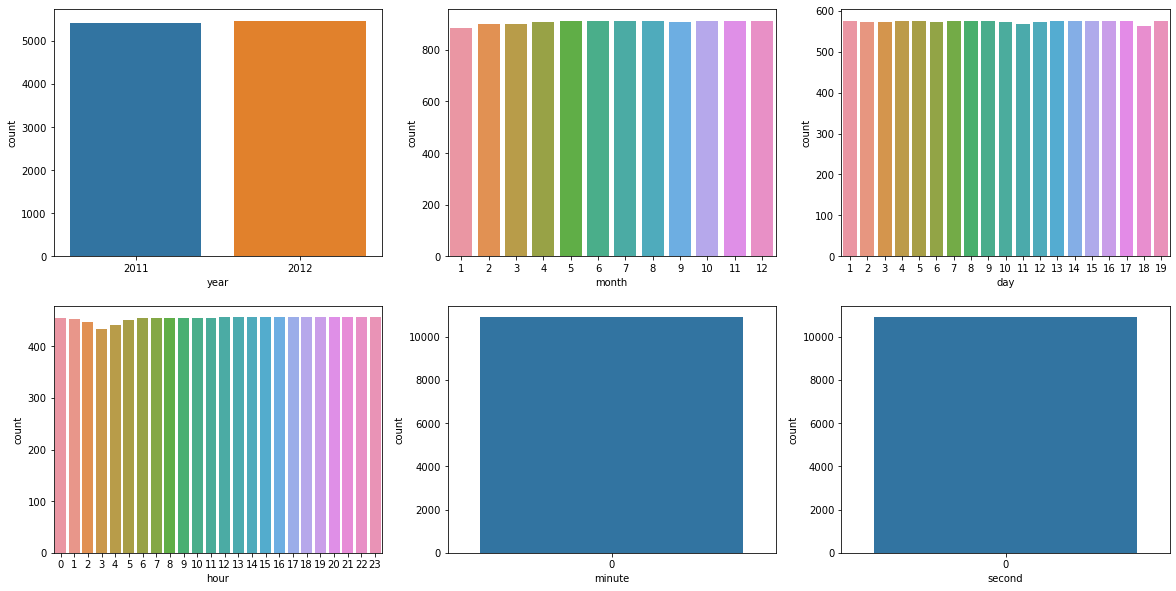

In [111]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(x='year', data=train)

plt.subplot(2,3,2)
sns.countplot(x='month', data=train)

plt.subplot(2,3,3)
sns.countplot(x='day', data=train)

plt.subplot(2,3,4)
sns.countplot(x='hour', data=train)

plt.subplot(2,3,5)
sns.countplot(x='minute', data=train)

plt.subplot(2,3,6)
sns.countplot(x='second', data=train)

plt.show()

### (4) X, y 컬럼 선택 및 train/test 데이터 분리

* X(feature)에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣어야 한다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수 도 있다.
* count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [112]:
X = train[['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',]].values
y = train[['count']].values

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### (5) LinearRegression 모델 학습

* sklearn 의 LinearRegression 모델 불러오기 및 학습하기

In [114]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

* 학습된 모델에 X_test를 입력해서 예측값 출력하기
* 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
* mse 값과 함께 rmse 값도 계산하기

In [117]:
predictions = model.predict(X_test)
predictions

array([[-33.96697339],
       [ 59.23679918],
       [112.62548605],
       ...,
       [195.79183719],
       [197.74006566],
       [294.24680107]])

In [118]:
rmse = mean_squared_error(y_test, predictions, squared = False)
rmse

140.47528542723452

### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

* x축에 X데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
* x축에 X데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기


In [119]:
col = ['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
X_test_df = pd.DataFrame(X_test, columns=col)
X_test_df['predictions'] = predictions
X_test_df['y_test'] = y_test

In [120]:

X_test_df

,season,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,predictions,y_test
0,1.0,1.0,2.0,6.56,9.090,80.0,8.9981,2011.0,2.0,4.0,9.0,-33.966973,127
1,2.0,1.0,2.0,14.76,16.665,71.0,19.0012,2011.0,4.0,8.0,10.0,59.236799,73
2,3.0,1.0,3.0,24.60,27.275,88.0,8.9981,2011.0,9.0,7.0,9.0,112.625486,190
3,2.0,1.0,1.0,16.40,20.455,56.0,23.9994,2011.0,4.0,4.0,1.0,44.829705,11
4,4.0,1.0,2.0,22.14,25.760,49.0,8.9981,2012.0,10.0,17.0,13.0,303.039383,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,1.0,1.0,1.0,12.30,13.635,61.0,19.9995,2012.0,3.0,7.0,1.0,76.753725,5
2174,1.0,1.0,1.0,28.70,31.820,39.0,16.9979,2012.0,3.0,15.0,17.0,356.228964,713
2175,2.0,1.0,1.0,18.86,22.725,72.0,15.0013,2011.0,5.0,6.0,22.0,195.791837,151
2176,1.0,1.0,1.0,12.30,13.635,42.0,31.0009,2012.0,1.0,18.0,13.0,197.740066,130


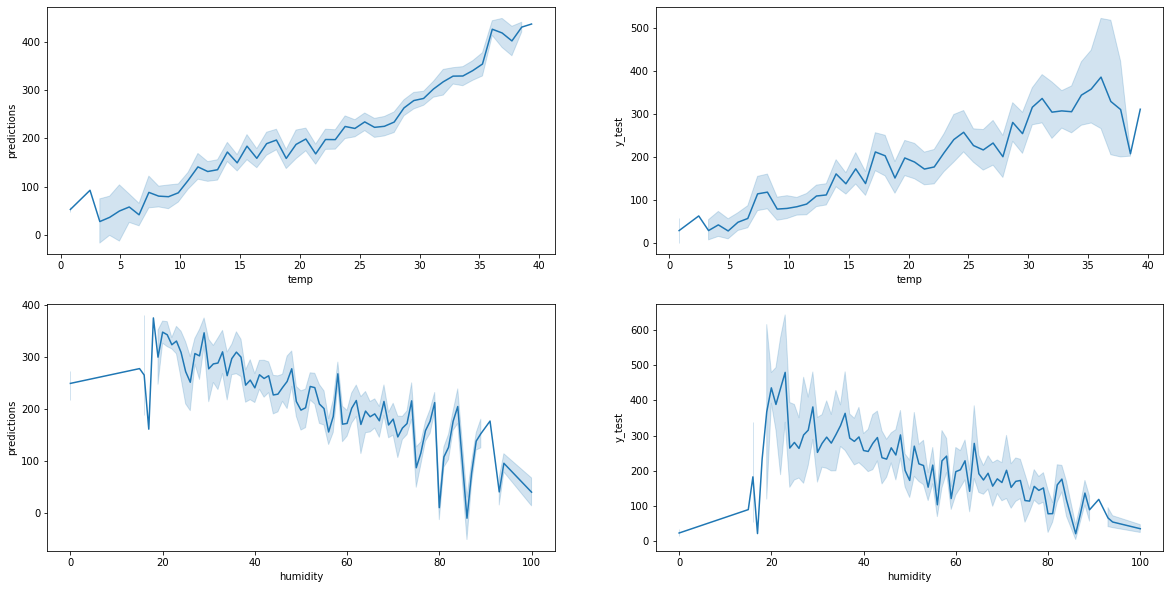

In [121]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['predictions'])

plt.subplot(2,2,2)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['y_test'])

plt.subplot(2,2,3)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['predictions'])

plt.subplot(2,2,4)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['y_test'])

plt.show()

데이터 학습하는 것까지는 할 수 있었는데 모델함수 짜는 부분에서 아직 코딩 짜기가 너무 어려워서 구글에서 참고.